
# Logistic Regression with Python

For this projec we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

## Import Libraries
Let's import some libraries to get started!

In [4]:
#Importing all the important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  plotly.express as px
import re
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [6]:
train = pd.read_csv('titanic_train.csv')

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis



## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

<Axes: >

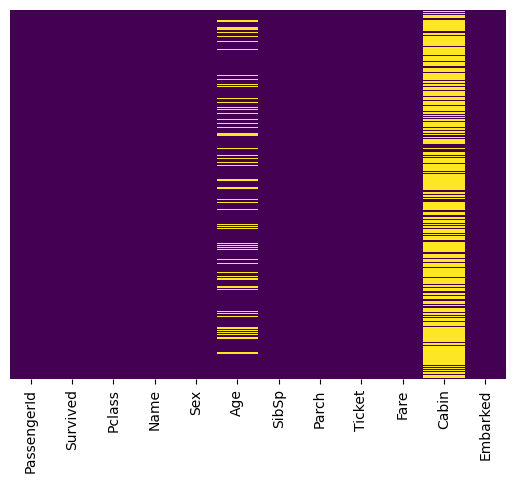

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0".

<Axes: xlabel='Survived', ylabel='count'>

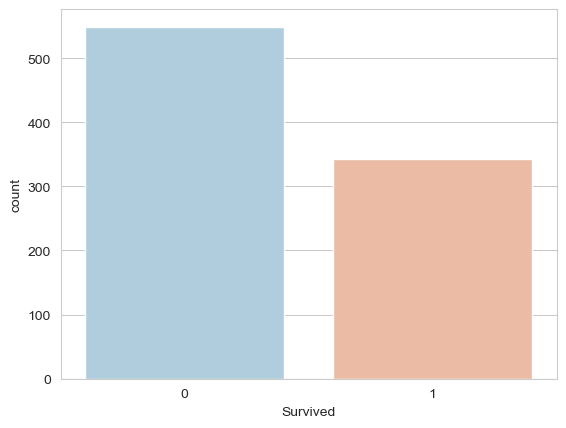

In [16]:
sns.countplot(x='Survived', data=train, hue='Survived', palette='RdBu_r', legend=False)


<Axes: xlabel='Survived', ylabel='count'>

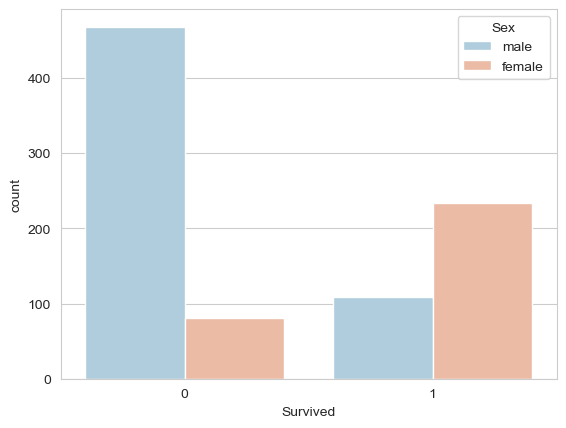

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

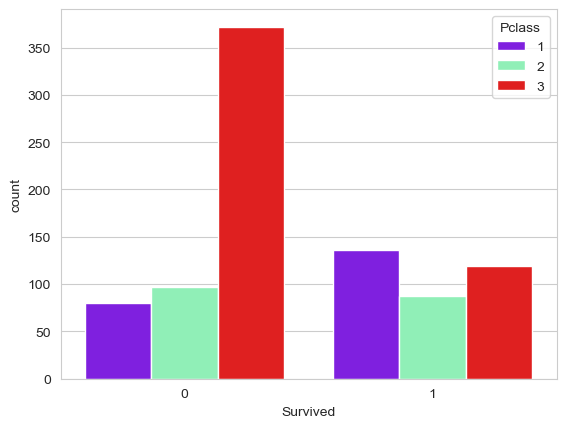

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<Axes: xlabel='Age', ylabel='Count'>

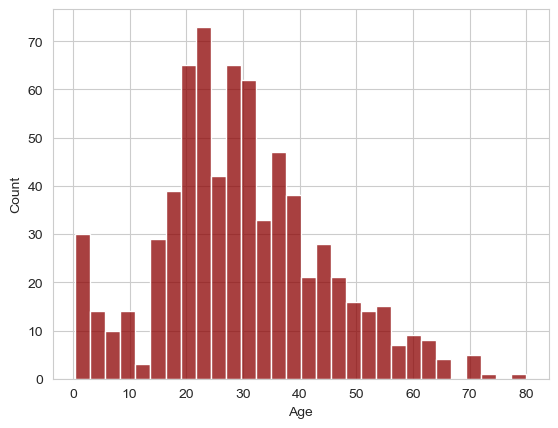

In [24]:
sns.histplot(train['Age'].dropna(), bins=30, color='darkred', kde=False)


<Axes: >

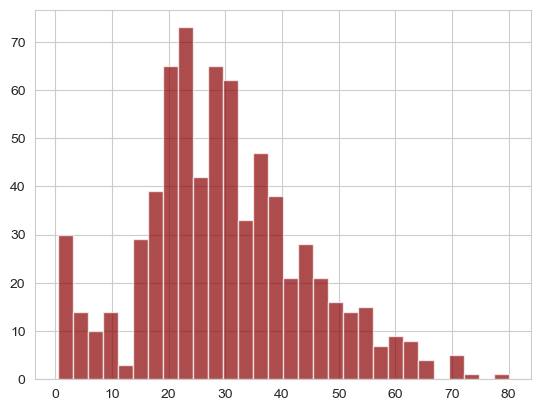

In [26]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

<Axes: xlabel='SibSp', ylabel='count'>

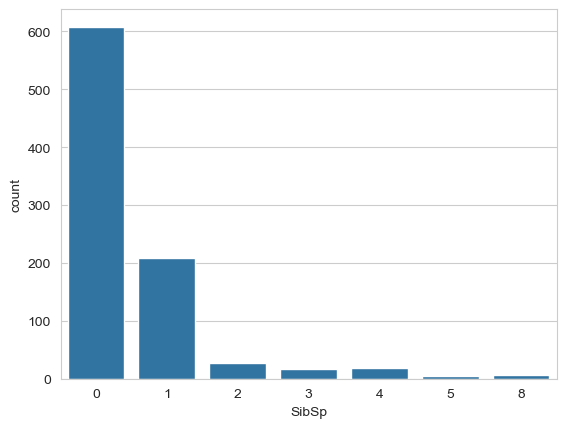

In [28]:
sns.countplot(x='SibSp',data=train)

<Axes: >

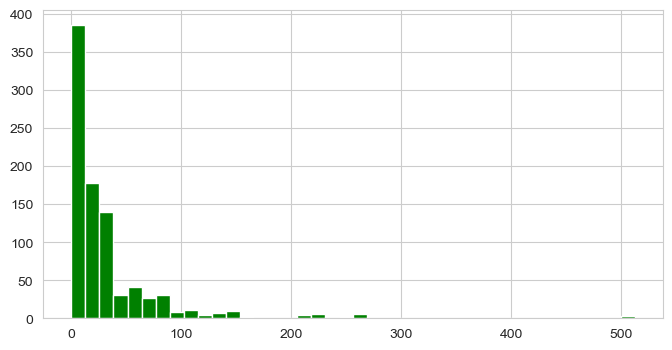

In [30]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


<Axes: xlabel='Pclass', ylabel='Age'>

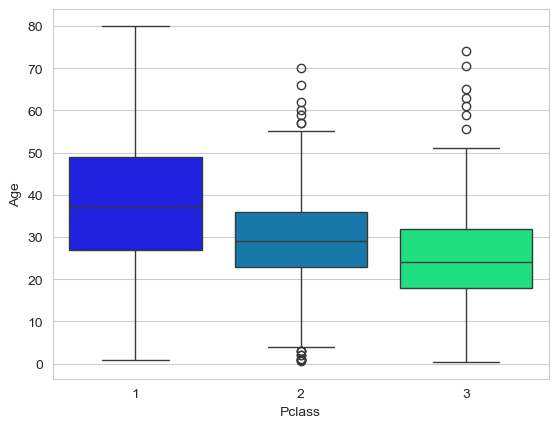

In [36]:
sns.boxplot(x='Pclass', y='Age', data=train, hue='Pclass', palette='winter', legend=False)


We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [38]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [50]:
def impute_age(cols):
    Age = cols.iloc[0]  # Instead of cols[0]
    Pclass = cols.iloc[1]  # Instead of cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


Now let's check that heat map again!

<Axes: >

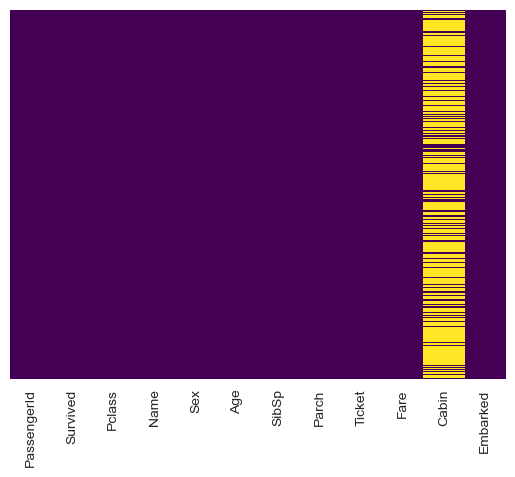

In [52]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [54]:
train.drop('Cabin',axis=1,inplace=True)

In [56]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [58]:
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [62]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [64]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [66]:
train = pd.concat([train,sex,embark],axis=1)

In [68]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True




# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set.

## Train Test Split

In [71]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [80]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)  # Increase max_iter


In [82]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\f5454719\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
predictions = logmodel.predict(X_test)

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [86]:
from sklearn.metrics import classification_report

In [88]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.81      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



### Model Performance

#### For Class 0 (Negative Class, likely "Survived = 0"):

- **Precision (0.79):**  
  Out of all the predictions where the model predicted class 0, 79% of them were actually correct.
  
- **Recall (0.91):**  
  The model correctly identified 91% of all the actual class 0 instances in the dataset.
  
- **F1-Score (0.85):**  
  This is the harmonic mean of precision and recall. An F1 score of 0.85 indicates a good balance between precision and recall for class 0.
  
- **Support (163):**  
  The number of actual instances of class 0 in the dataset.

#### For Class 1 (Positive Class, likely "Survived = 1"):

- **Precision (0.81):**  
  81% of the times the model predicted class 1, it was correct.
  
- **Recall (0.62):**  
  The model correctly identified 62% of all the actual class 1 instances in the dataset.
  
- **F1-Score (0.71):**  
  The F1 score is 0.71 for class 1, indicating that the model struggles a bit more to correctly classify class 1 compared to class 0.
  
- **Support (104):**  
  The number of actual instances of class 1 in the dataset.

#### Overall Performance:

- **Accuracy (0.80):**  
  The model's overall accuracy is 80%, meaning it correctly classified 80% of the instances across both classes.

#### Macro Average:
- **Precision (0.80):**  
  The average precision across both classes.
  
- **Recall (0.77):**  
  The average recall across both classes. This is a bit lower due to the lower recall for class 1.
  
- **F1-Score (0.78):**  
  The average F1 score across both classes.

#### Weighted Average:
- The weighted averages account for the imbalance in the number of instances between the two classes.  
  - **Precision (0.80)**
  - **Recall (0.80)**
  - **F1-Score (0.79)**

### Key Insights:
- The model is better at identifying class 0 (with a high recall of 91%), but its ability to identify class 1 is weaker (recall of 62%).
- There's a slight imbalance in the dataset (more instances of class 0 than class 1).
- The model performs well in terms of accuracy, but there is room for improvement in detecting class 1.
